### Step 1. Define the model structure

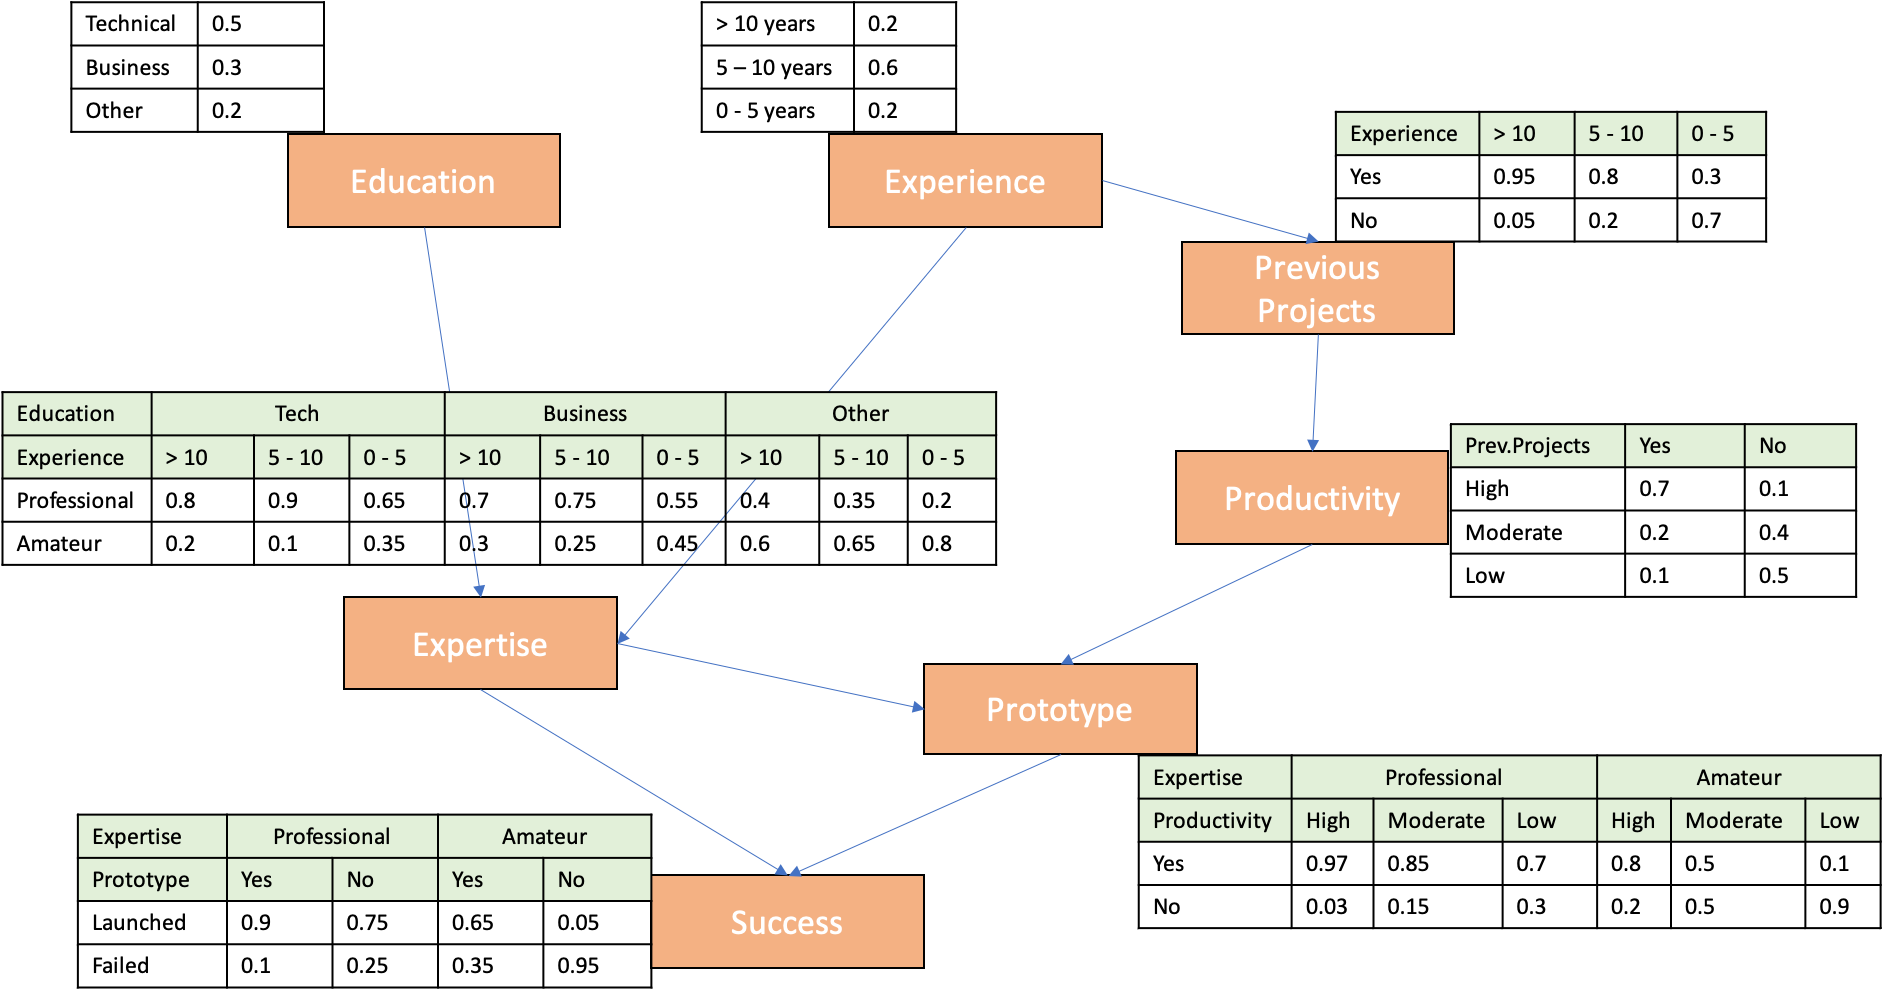

In [28]:
from IPython.display import Image
Image('/Users/mariya/Documents/Advanced_ML/Startup_model.png')

In [17]:
from pgmpy.models import BayesianModel

startup_model = BayesianModel([('Education', 'Expertise'),
                               ('Experience', 'Expertise'),
                               ('Experience','Projects'),
                               ('Expertise','Prototype'),
                               ('Expertise', 'Success'),
                               ('Projects','Productivity'),
                               ('Productivity','Prototype'),
                               ('Prototype','Success')])

### Step 2: Define the CPDs

In [20]:
from pgmpy.factors.discrete import TabularCPD


cpd_education = TabularCPD(variable='Education', 
                      variable_card=3,
                      values=[[0.5],[0.3],[0.2]])

cpd_experience = TabularCPD(variable='Experience', 
                      variable_card=3,
                      values=[[0.2],[0.6],[0.2]])

cpd_expertise = TabularCPD(variable='Expertise', 
                      variable_card=2,
                      values=[[0.8,0.9,0.65,0.7,0.75,0.55,0.4,0.35,0.2], [0.2,0.1,0.35,0.3,0.25,0.45,0.6,0.65,0.8]], 
                      evidence=['Education','Experience'], 
                      evidence_card=[3, 3])

cpd_projects = TabularCPD(variable='Projects', 
                      variable_card=2,
                      values=[[0.95,0.8,0.3], [0.05,0.2,0.7]], 
                      evidence=['Experience'], 
                      evidence_card=[3])

cpd_productivity = TabularCPD(variable='Productivity', 
                      variable_card=3,
                      values=[[0.7,0.1],[0.2,0.4],[0.1,0.5]], 
                      evidence=['Projects'], 
                      evidence_card=[2])

cpd_prototype = TabularCPD(variable='Prototype', 
                      variable_card=2,
                      values=[[0.97,0.85,0.7,0.8,0.5,0.1], [0.03,0.15,0.3,0.2,0.5,0.9]], 
                      evidence=['Expertise','Productivity'], 
                      evidence_card=[2, 3])

cpd_success = TabularCPD(variable='Success', 
                      variable_card=2,
                      values=[[0.9,0.75,0.65,0.05], [0.1,0.25,0.35,0.95]], 
                      evidence=['Expertise','Prototype'], 
                      evidence_card=[2, 2])

### Step 3: Add the CPDs to the model

In [21]:
# Associating the parameters with the model structure.
startup_model.add_cpds(cpd_education, cpd_experience, cpd_expertise, cpd_projects, cpd_productivity, cpd_prototype, cpd_success)
startup_model.check_model()

True

### Step 4: Run basic operations on the model 

In [22]:
startup_model.get_independencies()

(Education _|_ Productivity, Projects, Experience)
(Education _|_ Projects, Experience | Productivity)
(Education _|_ Productivity, Experience | Projects)
(Education _|_ Productivity, Projects | Experience)
(Education _|_ Experience | Productivity, Projects)
(Education _|_ Success, Prototype | Productivity, Expertise)
(Education _|_ Projects | Productivity, Experience)
(Education _|_ Prototype, Productivity, Success | Expertise, Projects)
(Education _|_ Productivity | Projects, Experience)
(Education _|_ Success | Expertise, Prototype)
(Education _|_ Success, Projects, Productivity, Prototype | Expertise, Experience)
(Education _|_ Prototype, Success | Productivity, Expertise, Projects)
(Education _|_ Success | Productivity, Expertise, Prototype)
(Education _|_ Prototype | Productivity, Expertise, Success)
(Education _|_ Success, Projects, Prototype | Productivity, Expertise, Experience)
(Education _|_ Projects | Productivity, Prototype, Experience)
(Education _|_ Projects | Productivi

In [27]:
print(startup_model.is_active_trail('Projects', 'Success'))
print(startup_model.is_active_trail('Projects', 'Success', observed=['Prototype']))

True
True


In [26]:
print(startup_model.is_active_trail('Education', 'Success'))
print(startup_model.is_active_trail('Education', 'Success', observed=['Expertise']))

True
True
